In [106]:
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import numpy as np
%matplotlib inline

In [134]:
# Load env environment variables
load_dotenv()

# Set crypto_api_key
crypto_api_key = os.getenv('crypto_api_key')

# Set the data endpoints
btc_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=1116&api_key='
eth_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1116&api_key='
ada_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ADA&tsym=USD&limit=1116&api_key='
bnb_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BNB&tsym=USD&limit=1116&api_key='
ltc_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=LTC&tsym=USD&limit=1116&api_key='

# Concatenate endpoints and key
btc_request_url = btc_url + crypto_api_key
eth_request_url = eth_url + crypto_api_key
ada_request_url = ada_url + crypto_api_key
bnb_request_url = bnb_url + crypto_api_key
ltc_request_url = ltc_url + crypto_api_key

In [135]:
response_btc = requests.get(btc_request_url).json()

response_eth = requests.get(eth_request_url).json()

response_ada = requests.get(ada_request_url).json()

response_bnb = requests.get(bnb_request_url).json()

response_ltc = requests.get(ltc_request_url).json()

In [136]:
btc_high_price = []
for data_point in response_btc['Data']['Data']:
    btc_high_value = data_point.get('high')
    btc_high_price.append(btc_high_value)

In [137]:
eth_high_price = []
for data_point in response_eth['Data']['Data']:
    eth_high_value = data_point.get('high')
    eth_high_price.append(eth_high_value)

In [138]:
ada_high_price = []
for data_point in response_ada['Data']['Data']:
    ada_high_value = data_point.get('high')
    ada_high_price.append(ada_high_value)

In [139]:
bnb_high_price = []
for data_point in response_bnb['Data']['Data']:
    bnb_high_value = data_point.get('high')
    bnb_high_price.append(bnb_high_value)

In [140]:
ltc_high_price = []
for data_point in response_ltc['Data']['Data']:
    ltc_high_value = data_point.get('high')
    ltc_high_price.append(ltc_high_value)

In [141]:
crypto_data = {
    'Bitcoin': btc_high_price,
    'Ethereum': eth_high_price,
    'Cardano': ada_high_price,
    'Binance': bnb_high_price,
    'Litecoin': ltc_high_price
}

# Creating a dataframe for the data
crypto_data_df = pd.DataFrame(crypto_data)

# Replacing the index column and adding dates with one data row representing the high price for one day over the past two years
crypto_data_df['Date'] = pd.date_range(start='2019-01-01', periods=len(crypto_data_df), freq='D')
crypto_df = crypto_data_df.set_index('Date', drop=True)

# Subsetting data to individual crypto datframes
btc_series = crypto_df['Bitcoin']
btc_df = btc_series.to_frame()

eth_series = crypto_df['Ethereum']
eth_df = eth_series.to_frame()

ada_series = crypto_df['Cardano']
ada_df = matic_series.to_frame()

bnb_series = crypto_df['Binance']
uni_df = uni_series.to_frame()

ltc_series = crypto_df['Litecoin']
ltc_df = atom_series.to_frame()

In [142]:
# Displaying the dataframe holding all five cryptos, showing the first and last five rows
display(crypto_df.head())
display(crypto_df.tail())

,Bitcoin,Ethereum,Cardano,Binance,Litecoin
Date,,,,,
2019-01-01,3938.75,145.16,0.04273,6.418,32.86
2019-01-02,3989.59,158.28,0.04695,6.286,33.98
2019-01-03,3965.52,152.90,0.04539,6.018,32.62
2019-01-04,3901.65,158.80,0.04490,6.191,33.20
2019-01-05,3926.92,160.54,0.04625,6.153,36.61


,Bitcoin,Ethereum,Cardano,Binance,Litecoin
Date,,,,,
2022-01-17,43198.05,3358.54,1.605,488.54,153.87
2022-01-18,42682.77,3244.64,1.638,479.77,153.43
2022-01-19,42575.28,3174.98,1.534,473.16,143.01
2022-01-20,43513.14,3272.69,1.427,462.73,142.86
2022-01-21,41116.66,3033.86,1.287,444.58,131.04


<AxesSubplot:title={'center':'Daily Returns of BTC,ETH,ADA,BNB, and LTC 2019-Present'}, xlabel='Date'>

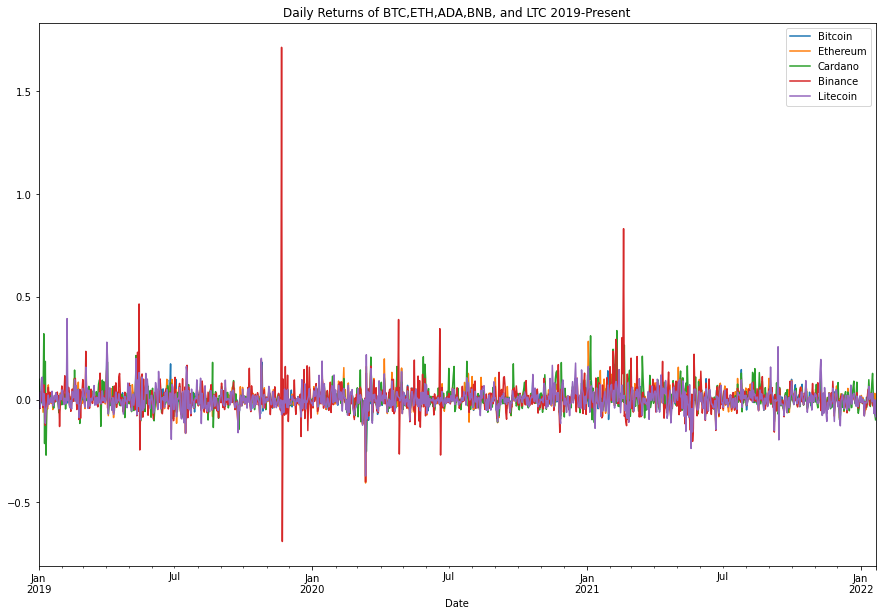

In [143]:
# Calculating daily return data for the whole two year period
crypto_daily_returns = crypto_df.pct_change()

# Plotting daily return data 
crypto_daily_returns.plot(figsize=(15,10), title='Daily Returns of BTC,ETH,ADA,BNB, and LTC 2019-Present')

<AxesSubplot:title={'center':'Cumulative Returns of BTC,ETH,ADA,BNB, and LTC 2019-Present'}, xlabel='Date'>

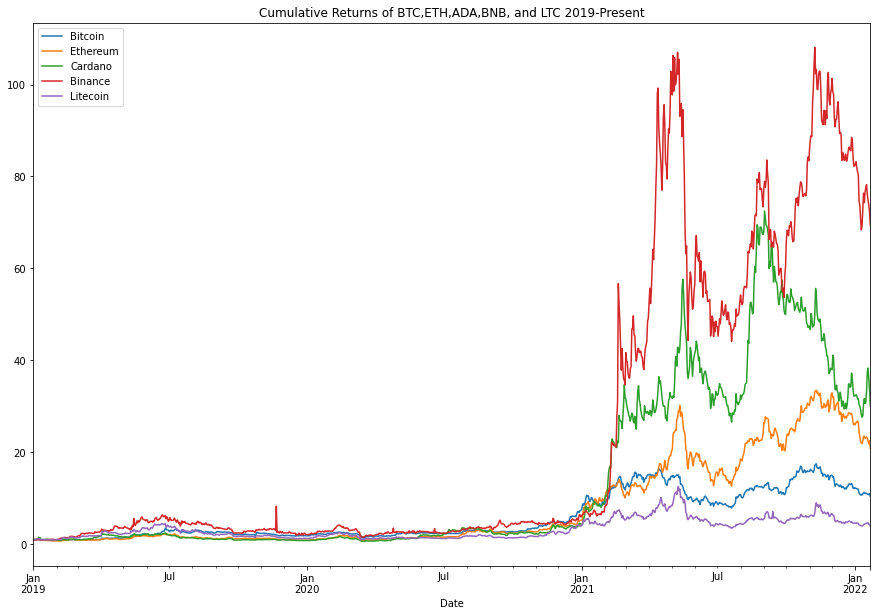

In [144]:
# Calculating cumulative return data for the whole two year period
crypto_cumulative_returns = (1 + crypto_daily_returns).cumprod()


# Plotting cumulative return data
crypto_cumulative_returns.plot(figsize=(15,10), title='Cumulative Returns of BTC,ETH,ADA,BNB, and LTC 2019-Present')

Bitcoin     0.034887
Ethereum    0.045876
Litecoin    0.052702
Cardano     0.053320
Binance     0.086631
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation of BTC,ETH,ADA,BNB, and LTC 2019-Present'}>

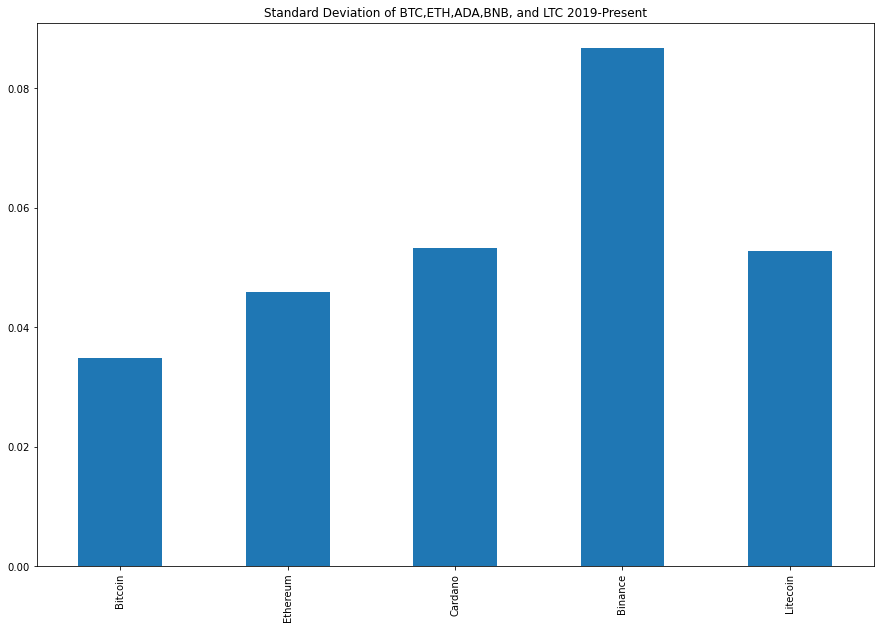

In [149]:
# Calculating the std from 2019 to present
crypto_std = crypto_daily_returns.std()

# Displaying the sorted std from 2019 to present
display(crypto_std.sort_values())

# Plotting the std data
crypto_std.plot.bar(figsize=(15,10), title='Standard Deviation of BTC,ETH,ADA,BNB, and LTC 2019-Present')

Bitcoin     0.666519
Ethereum    0.876457
Litecoin    1.006864
Cardano     1.018680
Binance     1.655076
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Deviation of BTC,ETH,ADA,BNB, and LTC 2019-Present'}>

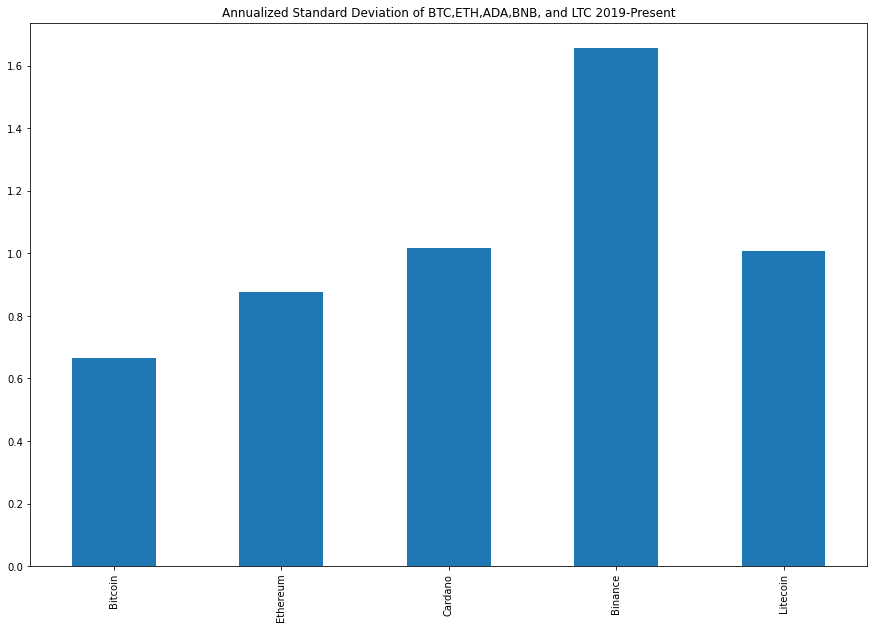

In [150]:
# The number of trading days in one crypto calendar year
trading_days=365

# Calculating annualized std for the whole two year period 
crypto_annualized_std = crypto_std * np.sqrt(trading_days)

# Displaying the annualized std 
display(crypto_annualized_std.sort_values())

# Plotting the annualized std data
crypto_annualized_std.plot.bar(figsize=(15,10), title='Annualized Standard Deviation of BTC,ETH,ADA,BNB, and LTC 2019-Present')

Litecoin    0.945936
Bitcoin     0.983624
Ethereum    1.355608
Cardano     1.585185
Binance     2.550126
dtype: float64

<AxesSubplot:title={'center':'Annualized Average Daily Return of BTC,ETH,ADA,BNB, and LTC 2019-Present'}>

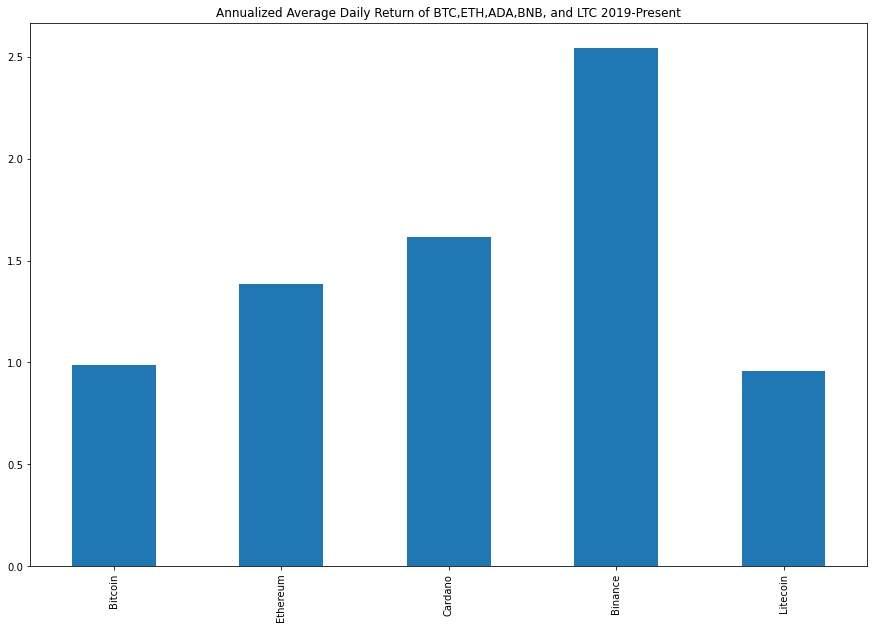

In [151]:
# Calculating the annual average daily returns for the whole two year period
crypto_annualized_returns = crypto_daily_returns.mean() * trading_days

# Displaying the annualized average daily returns
display(crypto_annualized__returns.sort_values())

# Plotting the annualized daily return data
crypto_annualized_returns.plot.bar(figsize=(15,10), title='Annualized Average Daily Return of BTC,ETH,ADA,BNB, and LTC 2019-Present')


Litecoin    0.939488
Bitcoin     1.475764
Binance     1.540791
Ethereum    1.546692
Cardano     1.556117
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of BTC,ETH,ADA,BNB, and LTC 2019-Present'}>

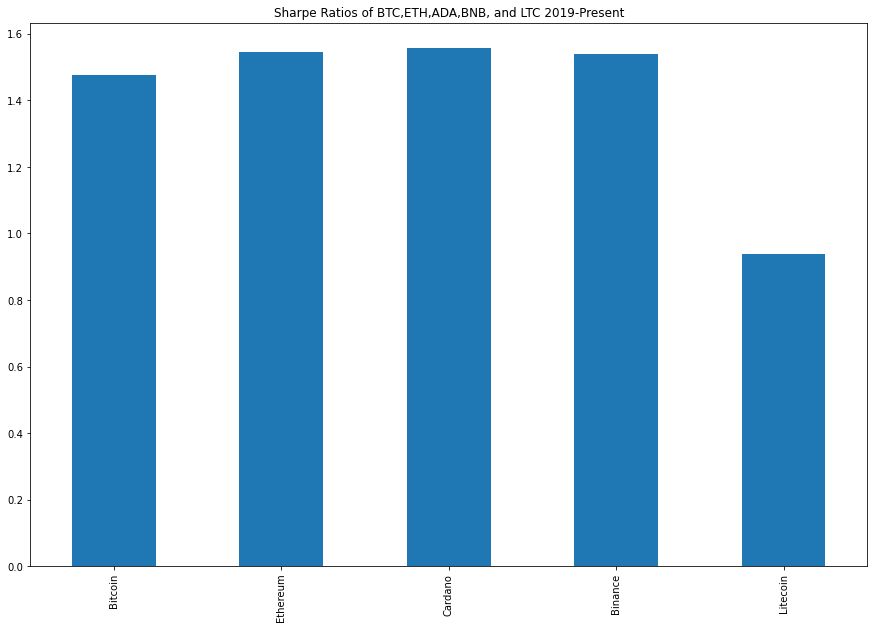

In [152]:
# Calculating the Sharpe Ratios 
crypto_sharpe_ratios = crypto_annualized__returns / crypto_annualized_std

# Displaying sorted Sharpe Ratios
display(crypto_sharpe_ratios.sort_values())

# Plotting the Sharpe Ratios
crypto_sharpe_ratios.plot.bar(figsize=(15,10), title='Sharpe Ratios of BTC,ETH,ADA,BNB, and LTC 2019-Present')